## Install OPEN3D

```python
pip install open3d-python
```

In [89]:
from open3d import *
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage import io
from scipy.misc import imsave
import cv2

## Camera Parameters
PinholeCameraIntrinsicParameters.PrimeSenseDefault are default camera parameter

image resolution = 640x480

focal length (fx, fy) = (525.0, 525.0)

optical center (cx, cy) = (319.5, 239.5)

In [2]:
extrinsics = [[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]

Read DUCK dataset
RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


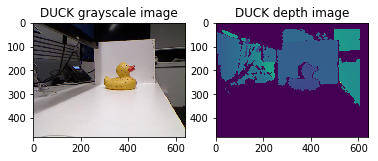

In [18]:
print("Read DUCK dataset")
color_raw = read_image("../data/color/0.jpg")
depth_raw = read_image("../data/depth/0.png")
rgbd_image = create_rgbd_image_from_color_and_depth(
    color_raw, depth_raw, convert_rgb_to_intensity = False)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('DUCK grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('DUCK depth image')
plt.imshow(rgbd_image.depth)
plt.show()
pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])

draw_geometries([pcd])

## Mean of point clouds

In [79]:
def avg_depth():
    num_imgs = len(glob.glob("../data/color/*.jpg"))
    depth_acc = np.zeros([480,640])
    for i in range(num_imgs):
        
        
    return depth_acc/(i+1)

In [94]:
depth_avg = avg_depth()

In [107]:
np.unique(depth_avg)

array([    0,    30,    31, ..., 11209, 11212, 11215], dtype=uint16)

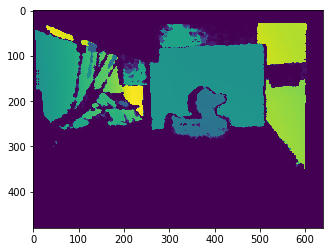

In [66]:
plt.imshow(depth_avg)

In [109]:
color_raw = read_image("../data/color/0.jpg")
depth_avg = avg_depth()

cv2.imwrite('intermsave.png',(depth_avg).astype(np.uint16))
depth_avg = read_image('intermsave.png')

rgbd_image = create_rgbd_image_from_color_and_depth(
    color_raw, depth_avg, convert_rgb_to_intensity = False);
pcd_avg = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
    PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd_avg.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
draw_geometries([pcd_avg])

## File IO

In [45]:
write_point_cloud("./save/redwood.ply", pcd)

True

In [51]:
print(np.asarray(pcd.points))

[[ -54.94885612   59.93228459 -137.69999743]
 [ -36.3114278    77.90761739 -178.99999619]
 [ -31.63333337   82.60819056 -189.80000019]
 ...
 [  45.82285728  -42.30514298  -97.20000029]
 [  48.60000014  -42.30514298  -97.20000029]
 [  50.63952243  -42.00047505  -96.49999738]]


In [87]:
np.asarray(depth_raw)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

## Scaling up PCD

In [8]:
pcd2 = PointCloud()
pcd2.points = Vector3dVector(np.asarray(pcd.points)*100)

# Mesh

In [6]:
mesh = read_triangle_mesh("./mesh/knot.ply")

In [9]:
draw_geometries([pcd2, mesh ])

In [52]:
mesh.triangles

std::vector<Eigen::Vector3i> with 2880 elements.
Use numpy.asarray() to access data.

# Normal Visualization

In [11]:
estimate_normals(pcd, search_param = KDTreeSearchParamHybrid(
        radius = 0.1, max_nn = 30))
draw_geometries([pcd])

## Converting Point Cloud to Mesh

In [75]:
volume = ScalableTSDFVolume(voxel_length = 4.0 / 512.0,
        sdf_trunc = 0.04, color_type = TSDFVolumeColorType.RGB8)
rgbd = create_rgbd_image_from_color_and_depth(color_raw, depth_raw,
        depth_trunc = 4.0, convert_rgb_to_intensity = False)
volume.integrate(rgbd, PinholeCameraIntrinsic(PinholeCameraIntrinsicParameters.PrimeSenseDefault), extrinsics)
mesh = volume.extract_triangle_mesh();

In [70]:
draw_geometries([mesh, ])